# Import Libraries

In [1]:
# Downloading, moving and unzipping files
import webbrowser
from time import sleep
import shutil
import os
#from zipfile import ZipFile
import glob

# DataFrame exploration and manipulation
import pandas as pd
import numpy as np
import datetime as dt

# Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Upload Data

In [3]:
# Climate data
weather_df = pd.read_csv('../../BikeSharing/MiBici/Weather/NOAA_NCEI_Climate_clean.csv', encoding='latin-1')

# COVID-19 data
covid_df = pd.read_csv('../../BikeSharing/MiBici/COVID/COVID_daily_cases_clean.csv', encoding='latin-1')

# Data Viz

For every visualization with bike data, you'll need to loop through files and run each df through a function that'll arrange your data in the way that you need for your analysis

## Bike Trip Counts

In [2]:
# obtain the csv data file names
path = "../../BikeSharing/MiBici/BikeTrips/CleanData/CleanerData/"
files = [file for file in os.listdir(path) if file.endswith(".csv")]

# Loop through each file, save as dataframe, and obtain the row count
output = pd.Series(name="Rows", dtype=int)
for file in files:
    df = pd.read_csv(os.path.join(path, file), encoding='latin-1')
    output.at[file.replace(".csv", "")] = df.shape[0]
output.at["Total"] = output.sum()

In [3]:
print('# Observations')
print('2015-2021:', output.at["Total"])
print('2017-2021:', output[25:85].sum())
print('2019-2021:', output[49:85].sum())


# Observations
2015-2021: 15286255
2017-2021: 13850499
2019-2021: 7930480


In [10]:
output[45:]

datos_abiertos_2018_09      289979
datos_abiertos_2018_10      326772
datos_abiertos_2018_11      309602
datos_abiertos_2018_12      285597
datos_abiertos_2019_01      404177
datos_abiertos_2019_02      388369
datos_abiertos_2019_03      419452
datos_abiertos_2019_04      361504
datos_abiertos_2019_05      411555
datos_abiertos_2019_06      375353
datos_abiertos_2019_07      146542
datos_abiertos_2019_08      397709
datos_abiertos_2019_09      259478
datos_abiertos_2019_10       96975
datos_abiertos_2019_11      104879
datos_abiertos_2019_12       79754
datos_abiertos_2020_01      142055
datos_abiertos_2020_02      134669
datos_abiertos_2020_03      105660
datos_abiertos_2020_04      129276
datos_abiertos_2020_05      136913
datos_abiertos_2020_06      143385
datos_abiertos_2020_07       83582
datos_abiertos_2020_08       80803
datos_abiertos_2020_09      144810
datos_abiertos_2020_10      131713
datos_abiertos_2020_11      104806
datos_abiertos_2020_12      124501
datos_abiertos_2021_

<AxesSubplot:>

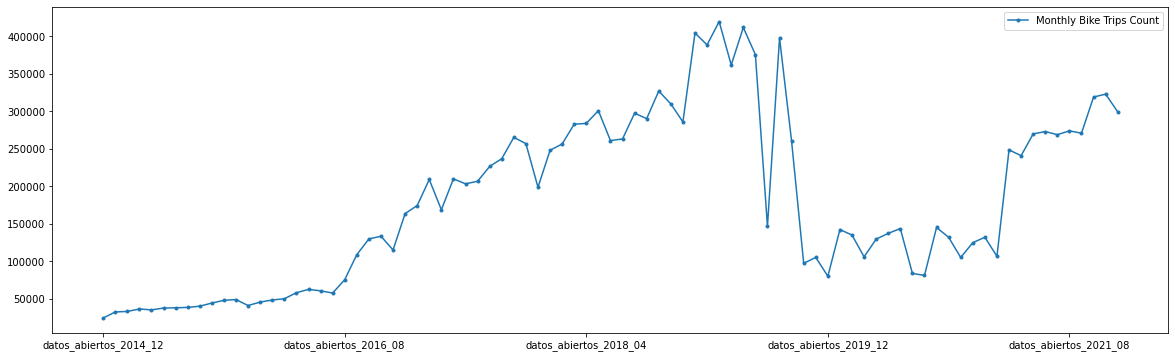

In [21]:
fig, ax = plt.subplots(figsize=(20, 6))
output[:-1].plot(label="Monthly Bike Trips Count", legend=True, marker='.')   # BLUE LINE

## COVID & Weather

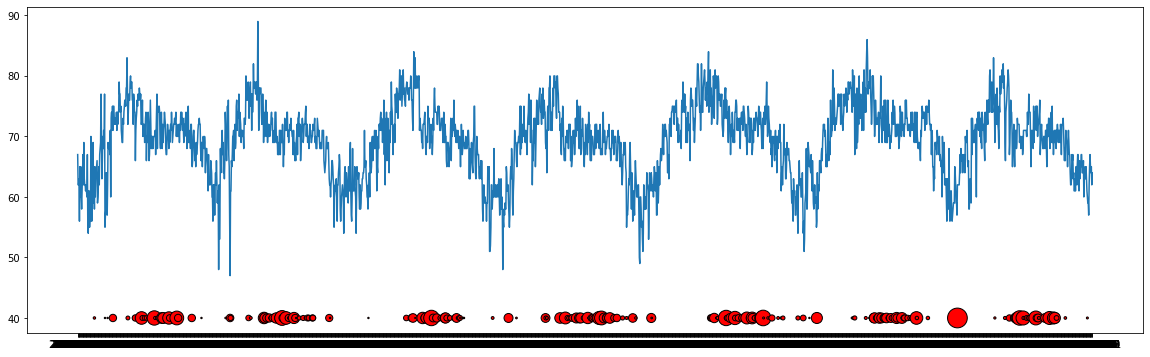

In [7]:
fig, ax = plt.subplots(figsize=(20, 6))

y = [40]*len(weather_df.PRCP) 
plt.plot(weather_df.Date, weather_df.TAVG)   # BLUE LINE
plt.scatter(weather_df.Date, y, s = weather_df.PRCP*100, color='red', edgecolor='black')  # RED DOT


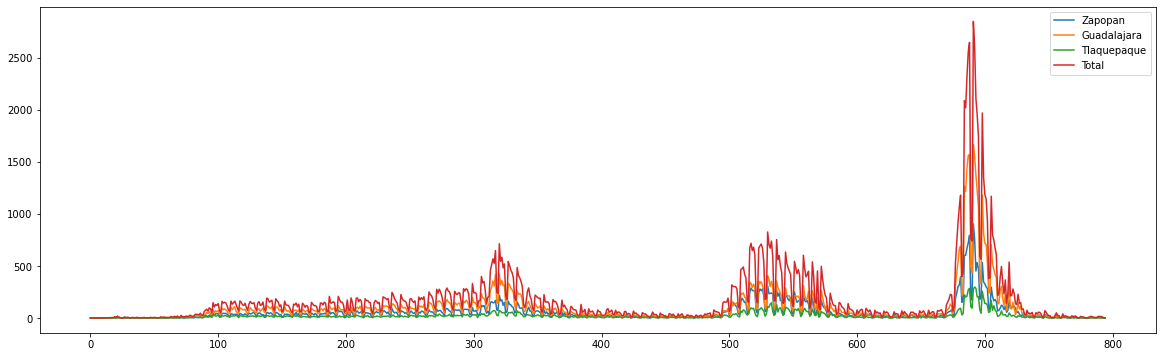

In [4]:
fig, ax = plt.subplots(figsize=(20, 6))

covid_df.Zapopan.plot(label="Zapopan", legend=True)
covid_df.Guadalajara.plot(label="Guadalajara", legend=True)
covid_df.Tlaquepaque.plot(label="Tlaquepaque", legend=True)
covid_df.Total.plot(label="Total", legend=True)

plt.show()